In [538]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [539]:
data = pd.read_csv("coffee_data.csv")
data.head()

,Coffee Type,label,1,2,3,4,5,6,7,8,...,592,593,594,595,596,597,598,599,600,601
0,Tauro,0,0.948504,0.947795,0.946445,0.944988,0.943754,0.943384,0.944066,0.945799,...,0.282806,0.281890,0.281222,0.280815,0.280693,0.280811,0.281193,0.281853,0.282838,0.284274
1,Tauro,0,0.905532,0.904839,0.903945,0.902695,0.901430,0.900893,0.901221,0.902677,...,0.258335,0.257492,0.256907,0.256648,0.256645,0.256880,0.257425,0.258203,0.259317,0.260800
2,Tauro,0,0.784601,0.784103,0.783307,0.782516,0.781724,0.781432,0.781957,0.783278,...,0.222330,0.221602,0.221146,0.220880,0.220885,0.221101,0.221590,0.222324,0.223326,0.224650
3,Tauro,0,0.720050,0.719402,0.718323,0.717160,0.716094,0.715715,0.716034,0.717204,...,0.198238,0.197453,0.196903,0.196654,0.196652,0.196831,0.197252,0.197917,0.198817,0.200071
4,Tauro,0,0.820835,0.820500,0.819734,0.818661,0.817800,0.817529,0.818071,0.819510,...,0.232847,0.232013,0.231440,0.231195,0.231231,0.231466,0.231987,0.232698,0.233674,0.234985


In [540]:
X = data.iloc[:,2:]
y = data["label"]
X.shape, y.shape

((70, 601), (70,))

In [541]:
unq = np.unique(y)
unq

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [542]:
colors = ['red', 'green', 'blue', 'brown', 'purple', 'orange']
cmap = ListedColormap(colors)

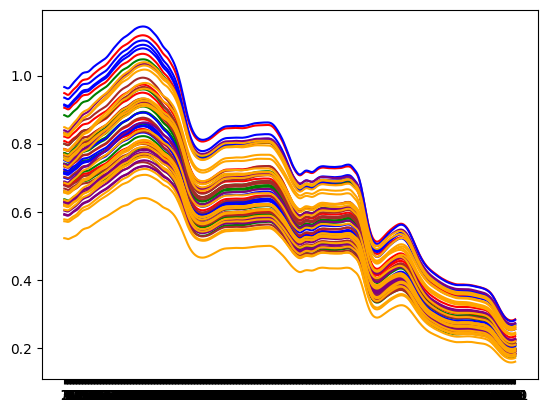

In [543]:
for label in unq:
    df = data.loc[data["label"]==label].iloc[:, 2:]
    plt.plot(df.T, c=cmap(label))
plt.show()

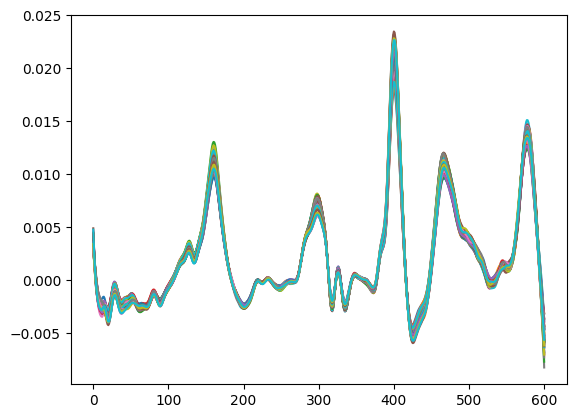

In [544]:
X = np.log(1.0/X)
X = savgol_filter(X, window_length=25, polyorder=5, deriv=1)
plt.plot(X.T)
plt.show()

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape

(56, 601)

In [546]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [547]:
np.sqrt(48)/2

3.4641016151377544

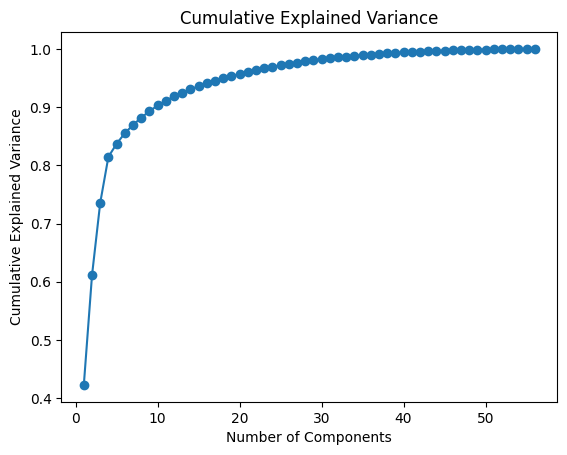

In [548]:
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [549]:
pca = PCA(3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

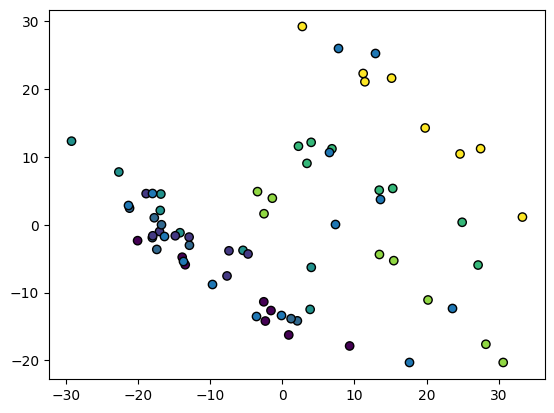

In [550]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors='k')
plt.show()

In [551]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

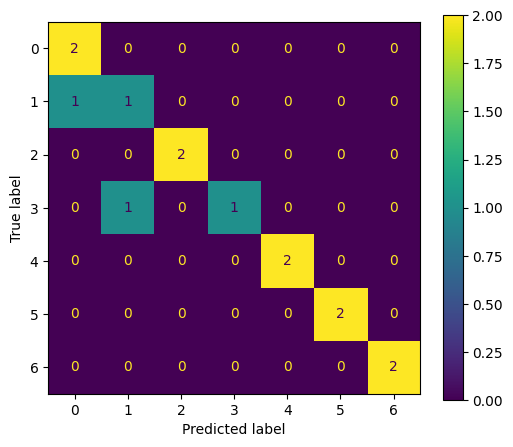

In [552]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)